# Movie Revenue Prediction Model

In this notebook, we aim to predict the box office revenue of movies based on various features such as genre, budget, runtime, popularity, and more. The dataset includes important attributes that could influence revenue. We'll preprocess the data, build a regression model using PyTorch, and evaluate its performance.


# Step 1: Import Libraries

We start by importing the necessary libraries that will help us with data manipulation, numerical computations, building and training our neural network, and plotting.



In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler
from sklearn.model_selection import train_test_split

# Step 2: Set Random Seed for Reproducibility

To ensure that our results are reproducible, we set a random seed. This allows us to obtain the same results each time we run the notebook.


In [2]:
torch.manual_seed(42)
np.random.seed(42)


# Step 3: Load the Data

We load the training and testing datasets from CSV files. The training data will be used to train our model, while the test data will be used to evaluate its performance.


In [3]:
train_data = pd.read_csv('./train.csv')
test_data = pd.read_csv('./test.csv')

train_data.head()


,title,vote_average,vote_count,release_date,runtime,budget,original_language,original_title,overview,popularity,tagline,genres,production_companies,production_countries,spoken_languages,keywords,revenue
0,Man of Steel,6.614,14310,2013-06-12,143.0,225000000.0,en,Man of Steel,A young boy learns that he has extraordinary p...,44.960,You will believe that a man can fly.,"Action, Adventure, Science Fiction","DC Entertainment, Syncopy, Peters Entertainmen...","United Kingdom, United States of America",English,"saving the world, flying, hope, superhero, bas...",668.045518
1,Hardbodies,4.979,48,1984-05-04,88.0,1995000.0,en,Hardbodies,Three middle-aged daddies visit California to ...,8.853,"If you don't know what they are, you don't kno...",Comedy,"Chroma III Productions, Columbia Pictures",United States of America,English,"politically incorrect, older man younger woman...",7.100000
2,A Most Wanted Man,6.500,1230,2014-07-25,121.0,15000000.0,en,A Most Wanted Man,A Chechen Muslim illegally immigrates to Hambu...,12.727,NaN,Thriller,"Amusement Park Films, Lionsgate, Demarest Film...","United Kingdom, United States of America, Germany",English,"immigrant, muslim, based on novel or book, esp...",31.554855
3,De Dana Dan,5.619,63,2009-11-27,166.0,8000000.0,hi,De Dana Dan,Two down on their luck men tries to kidnap a w...,6.922,NaN,"Action, Comedy, Crime","Venus Records & Tapes, Eros Worldwide",India,Hindi,romantic comedy,9.000000
4,Edison,5.311,291,2005-07-29,99.0,25000000.0,en,Edison,"In the troubled city of Edison, a young journa...",12.746,"In this city, only the cops are above the law.","Drama, Action, Thriller","Millennium Media, Nu Image, Ascendant Pictures...","Germany, United States of America",English,"police brutality, elite unit, police corruptio...",4.165675


- The info() method in Pandas provides a concise summary of a DataFrame. This summary includes information about the index data type and column data types, non-null values, and memory usage.

- The isnull().sum() method in pandas is used to count the number of missing values in a DataFrame or Series. It returns a Series where each index corresponds to a column in the DataFrame, and the value at that index indicates the number of null values in that column.

In [4]:
train_data.info()

print("="*50)

print(train_data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5979 entries, 0 to 5978
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 5979 non-null   object 
 1   vote_average          5979 non-null   float64
 2   vote_count            5979 non-null   int64  
 3   release_date          5979 non-null   object 
 4   runtime               5974 non-null   float64
 5   budget                5979 non-null   float64
 6   original_language     5979 non-null   object 
 7   original_title        5979 non-null   object 
 8   overview              5976 non-null   object 
 9   popularity            5979 non-null   float64
 10  tagline               5106 non-null   object 
 11  genres                5978 non-null   object 
 12  production_companies  5908 non-null   object 
 13  production_countries  5949 non-null   object 
 14  spoken_languages      5975 non-null   object 
 15  keywords             

# Step 4: Fill Missing Values

- We check for missing values in the `runtime` column and fill them with the median value of the column. This is important to ensure that we do not have any NaN values that could disrupt the training process.

#### The describe() method in pandas provides summary statistics for a DataFrame or Series. It calculates various metrics such as the count, mean, standard deviation, minimum, 25th percentile, 50th percentile (median), 75th percentile, and maximum values. These statistics can be helpful for understanding the distribution and characteristics of your data.

In [5]:
train_data['runtime'] = train_data['runtime'].fillna(train_data['runtime'].median())
test_data['runtime'] = test_data['runtime'].fillna(test_data['runtime'].median())


train_data.info()

print("\n"*3,"="*50,"\n"*3)

print(train_data.isnull().sum())

print("\n"*3,"="*50,"\n"*3)

print(train_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5979 entries, 0 to 5978
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 5979 non-null   object 
 1   vote_average          5979 non-null   float64
 2   vote_count            5979 non-null   int64  
 3   release_date          5979 non-null   object 
 4   runtime               5979 non-null   float64
 5   budget                5979 non-null   float64
 6   original_language     5979 non-null   object 
 7   original_title        5979 non-null   object 
 8   overview              5976 non-null   object 
 9   popularity            5979 non-null   float64
 10  tagline               5106 non-null   object 
 11  genres                5978 non-null   object 
 12  production_companies  5908 non-null   object 
 13  production_countries  5949 non-null   object 
 14  spoken_languages      5975 non-null   object 
 15  keywords             

#### The code provided explores the correlation between features and the distribution of genres and original languages in the training data. It uses Seaborn for visualization and provides insights into the relationships within the data.

              budget   runtime  popularity   revenue
budget      1.000000  0.189916    0.225674  0.730642
runtime     0.189916  1.000000    0.046156  0.177753
popularity  0.225674  0.046156    1.000000  0.232736
revenue     0.730642  0.177753    0.232736  1.000000


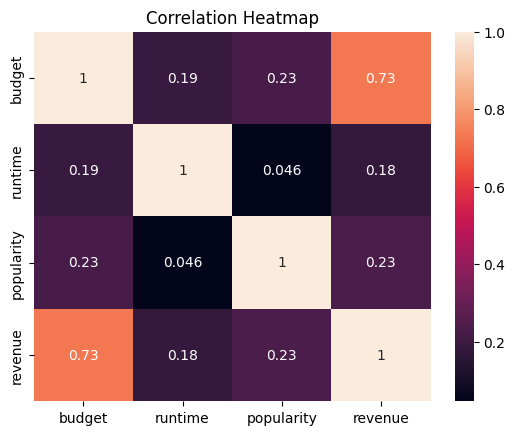

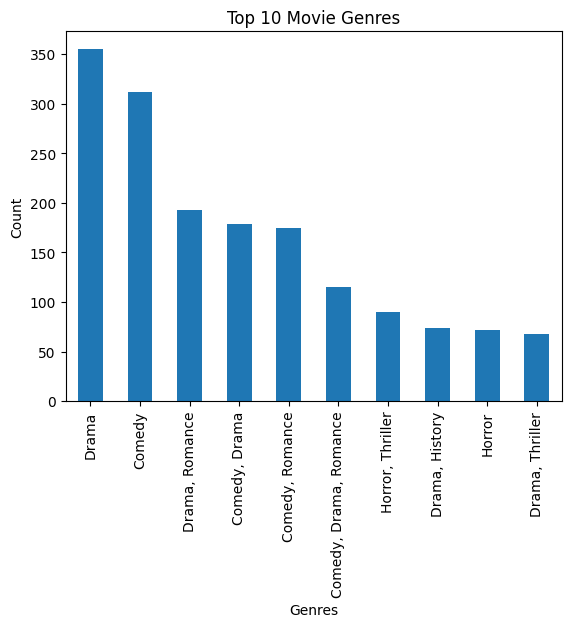

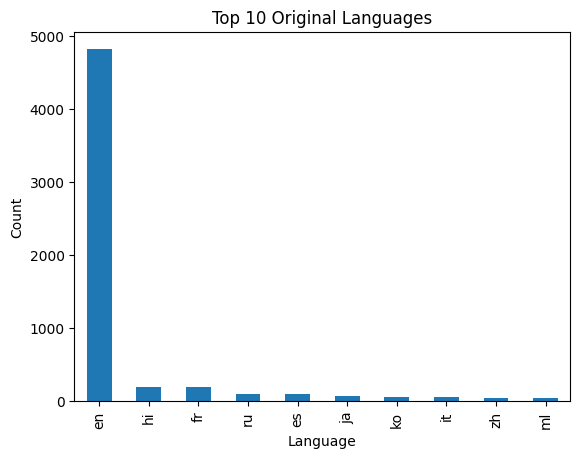

In [6]:
import seaborn as sns
# Scorrelation matrix
print(train_data[['budget', 'runtime', 'popularity', 'revenue']].corr())

# Heatmap of the correlation matrix
sns.heatmap(train_data[['budget', 'runtime', 'popularity', 'revenue']].corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()
# Plotting the value counts for 'genres'
train_data['genres'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Movie Genres')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.show()

# Plotting the value counts for 'original_language'
train_data['original_language'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Original Languages')
plt.xlabel('Language')
plt.ylabel('Count')
plt.show()


# Step 5: Convert Release Date to Datetime

We convert the `release_date` column to datetime format to extract features such as year and month from the date.

# Step 6: Extract Year and Month from Release Date

We extract the year and month from the `release_date` to create additional features that may be relevant for our prediction model.



In [7]:
# Convert release_date to datetime and extract year and month
train_data['release_date'] = pd.to_datetime(train_data['release_date'], errors='coerce')
test_data['release_date'] = pd.to_datetime(test_data['release_date'], errors='coerce')

train_data['release_year'] = train_data['release_date'].dt.year
train_data['release_month'] = train_data['release_date'].dt.month

test_data['release_year'] = test_data['release_date'].dt.year
test_data['release_month'] = test_data['release_date'].dt.month

train_data.head()

,title,vote_average,vote_count,release_date,runtime,budget,original_language,original_title,overview,popularity,tagline,genres,production_companies,production_countries,spoken_languages,keywords,revenue,release_year,release_month
0,Man of Steel,6.614,14310,2013-06-12,143.0,225000000.0,en,Man of Steel,A young boy learns that he has extraordinary p...,44.960,You will believe that a man can fly.,"Action, Adventure, Science Fiction","DC Entertainment, Syncopy, Peters Entertainmen...","United Kingdom, United States of America",English,"saving the world, flying, hope, superhero, bas...",668.045518,2013,6
1,Hardbodies,4.979,48,1984-05-04,88.0,1995000.0,en,Hardbodies,Three middle-aged daddies visit California to ...,8.853,"If you don't know what they are, you don't kno...",Comedy,"Chroma III Productions, Columbia Pictures",United States of America,English,"politically incorrect, older man younger woman...",7.100000,1984,5
2,A Most Wanted Man,6.500,1230,2014-07-25,121.0,15000000.0,en,A Most Wanted Man,A Chechen Muslim illegally immigrates to Hambu...,12.727,NaN,Thriller,"Amusement Park Films, Lionsgate, Demarest Film...","United Kingdom, United States of America, Germany",English,"immigrant, muslim, based on novel or book, esp...",31.554855,2014,7
3,De Dana Dan,5.619,63,2009-11-27,166.0,8000000.0,hi,De Dana Dan,Two down on their luck men tries to kidnap a w...,6.922,NaN,"Action, Comedy, Crime","Venus Records & Tapes, Eros Worldwide",India,Hindi,romantic comedy,9.000000,2009,11
4,Edison,5.311,291,2005-07-29,99.0,25000000.0,en,Edison,"In the troubled city of Edison, a young journa...",12.746,"In this city, only the cops are above the law.","Drama, Action, Thriller","Millennium Media, Nu Image, Ascendant Pictures...","Germany, United States of America",English,"police brutality, elite unit, police corruptio...",4.165675,2005,7


# Step 7: Split Genres

We split the `genres` column into lists of genres by using the `str.split()` function. This allows us to process multiple genres associated with each movie.

# Step 8: Fill Missing Genres

For any entries that do not contain a list of genres (e.g., missing values), we replace them with an empty list. This ensures consistency in the data structure.


In [8]:
# Splitting the genres column based on commas
train_data['genres_split'] = train_data['genres'].str.split(',')
test_data['genres_split'] = test_data['genres'].str.split(',')

# Checking for missing values
print(train_data['genres_split'].isnull().sum())


# Filling missing values with an empty list
train_data['genres_split'] = train_data['genres_split'].apply(lambda x: x if isinstance(x, list) else [])
test_data['genres_split'] = test_data['genres_split'].apply(lambda x: x if isinstance(x, list) else [])


1


# Step 9: Encode Genres Using MultiLabelBinarizer

We use the `MultiLabelBinarizer` from scikit-learn to encode the genres into a binary format. Each genre becomes a separate column, and movies that belong to a genre will have a value of 1 in that column, while others will have 0.


In [9]:
from sklearn.preprocessing import MultiLabelBinarizer

# Initialize the MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Fit and transform the genres in both the training and test data
encoded_genres_train = mlb.fit_transform(train_data['genres_split'])
encoded_genres_test = mlb.transform(test_data['genres_split'])

# Convert to DataFrame with correct column names
genres_train_df = pd.DataFrame(encoded_genres_train, columns=mlb.classes_)
genres_test_df = pd.DataFrame(encoded_genres_test, columns=mlb.classes_)

print(genres_train_df.shape)
print(genres_train_df.head())


(5979, 37)
    Action   Adventure   Animation   Comedy   Crime   Documentary   Drama  \
0        0           1           0        0       0             0       0   
1        0           0           0        0       0             0       0   
2        0           0           0        0       0             0       0   
3        0           0           0        1       1             0       0   
4        1           0           0        0       0             0       0   

    Family   Fantasy   History  ...  Fantasy  History  Horror  Music  Mystery  \
0        0         0         0  ...        0        0       0      0        0   
1        0         0         0  ...        0        0       0      0        0   
2        0         0         0  ...        0        0       0      0        0   
3        0         0         0  ...        0        0       0      0        0   
4        0         0         0  ...        0        0       0      0        0   

   Romance  Science Fiction  Thriller  

o:\Python 3.12\Lib\site-packages\sklearn\preprocessing\_label.py:900: UserWarning: unknown class(es) ['TV Movie'] will be ignored
  warnings.warn(


# Step 10: Drop Old Genres Column

We drop the original `genres` column and the `genres_split` column since they are no longer needed after encoding.
# Step 11: Concatenate Encoded Genres with the Original Data

We concatenate the encoded genres DataFrames with the original training and test DataFrames. This adds the new binary genre features to our dataset.


In [10]:
# Drop the old 'genres' column and the split column
train_data = train_data.drop(['genres', 'genres_split'], axis=1)
test_data = test_data.drop(['genres', 'genres_split'], axis=1)

# Concatenate the encoded genres with the original dataset
train_data = pd.concat([train_data, genres_train_df], axis=1)
test_data = pd.concat([test_data, genres_test_df], axis=1)

# Check the final shape
print(train_data.shape)
print(test_data.shape)


(5979, 55)
(2563, 55)


# Step 12: Define Features and Target Variable

We define our features (input variables) and the target variable (`revenue`) we want to predict. The features include budget, runtime, popularity, and the encoded genres and languages.
# Step 13: Log-Transform the Target Variable

Since the `revenue` values can vary widely, we log-transform them using NumPy's log1p function. This helps to stabilize variance and improve model performance.



In [11]:
# Features and Target
features = ['budget', 'runtime', 'popularity', 'vote_average', 'vote_count', 'release_year', 'release_month'] + list(genres_train_df.columns)
X_train = train_data[features]
y_train = train_data['revenue']

# Log-transform the target variable to reduce skewness
y_train = np.log1p(y_train)

X_test = test_data[features]


# Step 14: Standardize Features

We standardize the features using `StandardScaler` to ensure they all contribute equally to the model training. This involves scaling the features to have a mean of 0 and a standard deviation of 1.

In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



### Add Interaction Features
We create interaction features by multiplying some key numerical variables (budget, runtime, and popularity).

#### Why Create Interaction Features?
- **Capture Relationships**: These features help the model understand how two or more factors work together to impact revenue. For example, a movie's budget and runtime might jointly influence its earnings.

#### How It Works:
1. **New Features**: We create new features by multiplying:
   - **Budget and Runtime**
   - **Budget and Popularity**

2. **Combining Data**: We then combine these new features with our existing data using `np.hstack()`.

Adding these interaction features gives the model more insights, which can lead to better revenue predictions.


In [13]:
# Adding interaction features
X_train_scaled = np.hstack([X_train_scaled, (X_train_scaled[:, [0]] * X_train_scaled[:, [1]]), (X_train_scaled[:, [0]] * X_train_scaled[:, [2]])])
X_test_scaled = np.hstack([X_test_scaled, (X_test_scaled[:, [0]] * X_test_scaled[:, [1]]), (X_test_scaled[:, [0]] * X_test_scaled[:, [2]])])


# Step 15: Define the Neural Network Model

In this cell, we define our neural network architecture using PyTorch. The `RevenuePredictor` class consists of several fully connected layers, each followed by batch normalization and ReLU activation functions. We include dropout for regularization to reduce the risk of overfitting. The architecture is designed to predict revenue based on the input features.

# Step 16: Initialize the Model, Define Loss Function and Optimizer

We create an instance of our model, define the loss function as Mean Squared Error (MSE) since we are performing regression, and choose an optimizer (Adam) to minimize the loss.


In [14]:
# Making the neural network model
class RevenuePredictor(nn.Module):
    def __init__(self, input_size):
        super(RevenuePredictor, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)  # First fully connected layer
        self.bn1 = nn.BatchNorm1d(128)  # Batch normalization
        self.fc2 = nn.Linear(128, 64)  # Second fully connected layer
        self.bn2 = nn.BatchNorm1d(64)  # Batch normalization
        self.dropout = nn.Dropout(0.3)  # Dropout layer to prevent overfitting
        self.fc3 = nn.Linear(64, 32)  # Third fully connected layer
        self.fc4 = nn.Linear(32, 1)  # Output layer
        self.relu = nn.ReLU()  # ReLU activation function

    def forward(self, x):
        x = self.relu(self.bn1(self.fc1(x)))  # Forward pass through first layer
        x = self.dropout(x)  # Apply dropout
        x = self.relu(self.bn2(self.fc2(x)))  # Forward pass through second layer
        x = self.dropout(x)  # Apply dropout
        x = self.relu(self.fc3(x))  # Forward pass through third layer
        x = self.fc4(x)  # Output
        return x

# Initializing the model
input_size = X_train_scaled.shape[1]
model = RevenuePredictor(input_size)

# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)


# Step 17: Convert Data to PyTorch Tensors

We convert the scaled features and the target variable into PyTorch tensors. This allows us to utilize them in our neural network.


In [15]:
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)

X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)


# Step 18: Train the Model
Here, we train the model over a specified number of epochs. For each epoch:
1. We set the model to training mode.
2. Zero the gradients to prevent accumulation from previous iterations.
3. Perform a forward pass to compute predictions.
4. Calculate the loss between predicted and actual revenue values.
5. Perform a backward pass to compute gradients.
6. Update model weights based on computed gradients.
We track the training loss for each epoch and print the loss every 10 epochs to monitor the training progress.



Epoch [10/250], Loss: 2.8399
Epoch [20/250], Loss: 1.3882
Epoch [30/250], Loss: 1.1341
Epoch [40/250], Loss: 1.0165
Epoch [50/250], Loss: 0.9632
Epoch [60/250], Loss: 0.9054
Epoch [70/250], Loss: 0.8796
Epoch [80/250], Loss: 0.8704
Epoch [90/250], Loss: 0.8330
Epoch [100/250], Loss: 0.8142
Epoch [110/250], Loss: 0.8136
Epoch [120/250], Loss: 0.7942
Epoch [130/250], Loss: 0.7733
Epoch [140/250], Loss: 0.7629
Epoch [150/250], Loss: 0.7618
Epoch [160/250], Loss: 0.7395
Epoch [170/250], Loss: 0.7416
Epoch [180/250], Loss: 0.7424
Epoch [190/250], Loss: 0.7348
Epoch [200/250], Loss: 0.7134
Epoch [210/250], Loss: 0.6996
Epoch [220/250], Loss: 0.6979
Epoch [230/250], Loss: 0.6864
Epoch [240/250], Loss: 0.6775
Epoch [250/250], Loss: 0.6745


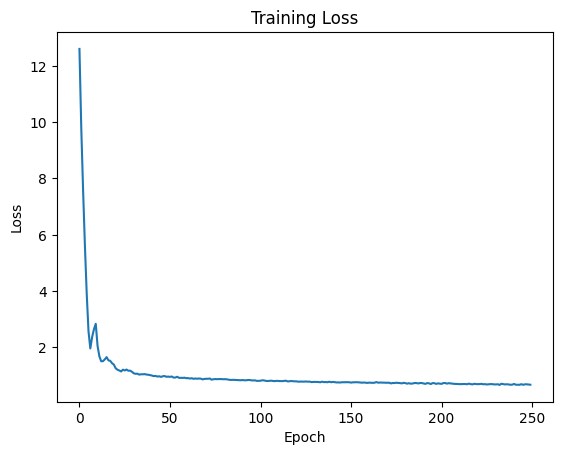

In [16]:
# Training loop
num_epochs = 250
train_losses = []

for epoch in range(num_epochs):
    model.train()  # Set model to training mode
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    optimizer.zero_grad()  # Clear gradients
    loss.backward()  # Backpropagation
    optimizer.step()  # Update weights

    train_losses.append(loss.item())

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Plot training loss
plt.plot(train_losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()


# Step 19: Make Predictions

Finally, we use the trained model to make predictions on the test dataset. The predicted values are then transformed back using the inverse of the log transformation to obtain the actual revenue values.
# Step 20: Prepare Submission File

We prepare the submission file by creating a DataFrame that contains the movie IDs and their corresponding predicted revenues. This will be saved to a CSV file for submission.


In [17]:
# predictions
model.eval()
with torch.no_grad():
    y_pred_tensor = model(X_test_tensor)

# Convert predictions back to original scale (Inverse of Log-Transform)
y_pred = np.expm1(y_pred_tensor.numpy()).flatten()


# Submission DataFrame
submission = pd.DataFrame({
    'id': test_data['id'].values,
    'revenue': y_pred
})

# Submission File
submission.to_csv('my_submission.csv', index=False)

print("Submission file 'my_submission.csv' is created successfully!")


Submission file 'my_submission.csv' is created successfully!


In [18]:
print(submission)

        id     revenue
0        0  134.190887
1        1  198.898087
2        2    5.589623
3        3   59.537868
4        4    3.754841
...    ...         ...
2558  2558    2.530907
2559  2559   82.774864
2560  2560  121.712242
2561  2561    1.896310
2562  2562    2.806618

[2563 rows x 2 columns]


# Conclusion

In this notebook, we have successfully built and trained a regression model to predict movie revenues based on various features. We have also documented each step in detail for clarity and reproducibility.


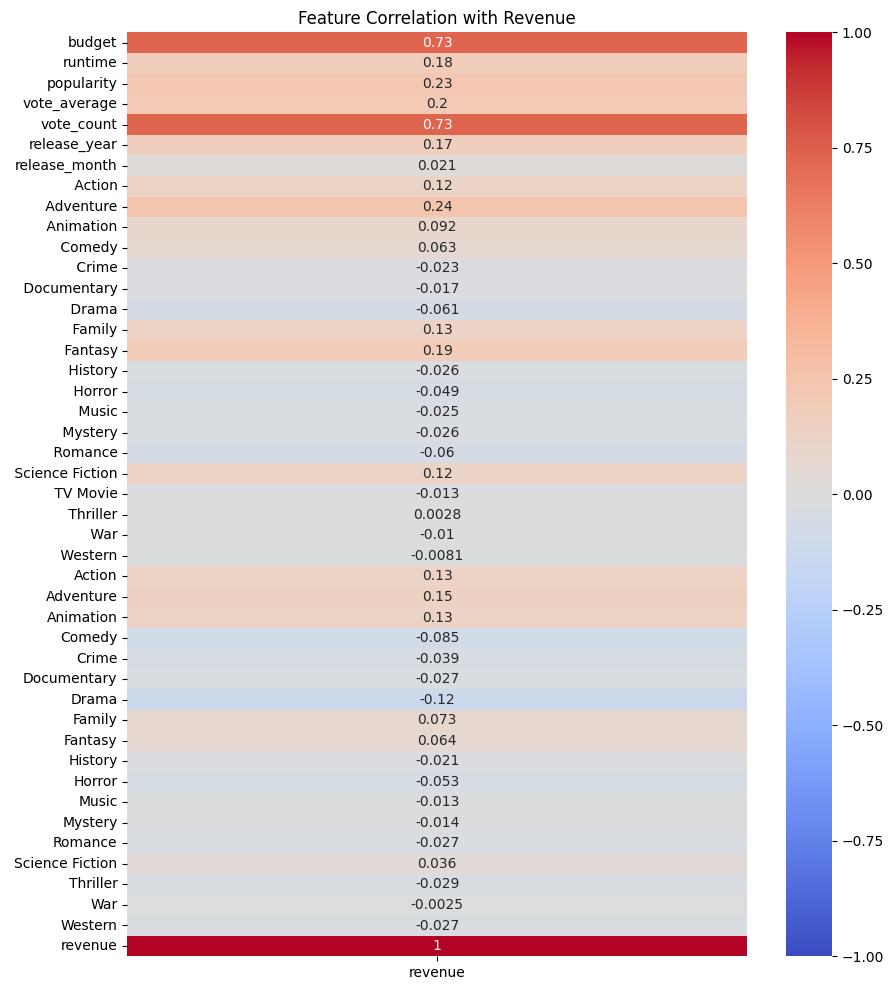

                    budget   runtime  popularity  vote_average  vote_count  \
budget            1.000000  0.189916    0.225674      0.067747    0.558570   
runtime           0.189916  1.000000    0.046156      0.306569    0.168226   
popularity        0.225674  0.046156    1.000000      0.133701    0.176275   
vote_average      0.067747  0.306569    0.133701      1.000000    0.363509   
vote_count        0.558570  0.168226    0.176275      0.363509    1.000000   
release_year      0.257106  0.067470    0.107026     -0.073123    0.154275   
release_month     0.024150  0.091067    0.004668      0.091024    0.036690   
 Action           0.185600  0.066969    0.031059     -0.018055    0.097003   
 Adventure        0.296774 -0.010347    0.085461     -0.028608    0.147176   
 Animation        0.092588 -0.151274    0.018736      0.042627    0.060250   
 Comedy           0.068265 -0.122450    0.007121     -0.032985    0.011048   
 Crime           -0.001337  0.010954    0.011598     -0.014483  

In [19]:
# Relationships between features and predicted revenue
correlation_matrix = train_data[features + ['revenue']].corr()

# Correlations heatmap
plt.figure(figsize=(10, 12))
sns.heatmap(correlation_matrix[['revenue']], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Feature Correlation with Revenue')
plt.show()

print(correlation_matrix)